# File for quick check of biotron data logger information

##Import components

In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline

##Bring data in to Pandas dataframe

In [2]:
PotTemps=pd.read_csv('C:\GitHubRepos\PotTemp\PotTempCR1000Calibration.dat', #specify file path for data to read in
                         parse_dates=True, #tell the function to parse date columns to datetime formats
                         skiprows = [0,2,3], #leave out the first 2 rows which have redundant information
                         index_col = 0, #Use the first column, which is Date, as an index
                         na_values = 'NAN')


In [3]:
PotTemps.ix[-10:,-10:]

,T109_C(24),T109_C(25),T109_C(26),T109_C(27),T109_C(28),T107_C(1),T107_C(2),T107_C(3),T107_C(4),T107_C(5)
TIMESTAMP,,,,,,,,,,
2014-10-28 14:00:00,-2.711,-2.842,-3.105,-2.875,-2.963,12.59,12.58,12.53,12.53,NaN
2014-10-28 14:15:00,-2.711,-2.832,-3.105,-2.875,-2.963,12.61,12.61,12.55,12.54,NaN
2014-10-28 14:30:00,-2.711,-2.837,-3.104,-2.875,-2.962,12.64,12.64,12.58,12.57,NaN
2014-10-28 14:45:00,-2.711,-2.842,-3.104,-2.875,-2.962,12.66,12.67,12.61,12.60,NaN
2014-10-28 15:00:00,-2.709,-2.840,-3.102,-2.873,-2.960,12.69,12.70,12.64,12.63,NaN
2014-10-28 15:15:00,-2.709,-2.829,-3.103,-2.873,-2.960,12.72,12.72,12.66,12.66,NaN
2014-10-28 15:30:00,-2.711,-2.831,-3.105,-2.875,-2.962,12.74,12.75,12.70,12.69,NaN
2014-10-28 15:45:00,-2.700,-2.831,-3.094,-2.875,-2.957,12.78,12.79,12.73,12.72,NaN
2014-10-28 16:00:00,-2.700,-2.831,-3.094,-2.864,-2.957,12.82,12.82,12.76,12.76,NaN


##Check rows and columns look ok

In [4]:
PotTemps.shape

(210, 34)

In [5]:
PotTemps.index

DatetimeIndex(['2014-10-27 16:02:00', '2014-10-27 16:03:00',
               '2014-10-27 16:04:00', '2014-10-27 16:05:00',
               '2014-10-27 16:06:00', '2014-10-27 16:07:00',
               '2014-10-27 16:08:00', '2014-10-27 16:09:00',
               '2014-10-27 16:10:00', '2014-10-27 16:11:00', 
               ...
               '2014-10-28 14:00:00', '2014-10-28 14:15:00',
               '2014-10-28 14:30:00', '2014-10-28 14:45:00',
               '2014-10-28 15:00:00', '2014-10-28 15:15:00',
               '2014-10-28 15:30:00', '2014-10-28 15:45:00',
               '2014-10-28 16:00:00', '2014-10-28 16:15:00'],
              dtype='datetime64[ns]', name=u'TIMESTAMP', length=210, freq=None, tz=None)

##Extract temperature data into data frame so we can look at it

In [6]:
PotTemp107 = PotTemps.ix[:,                     #create the dateframe for the specified period 
                         [X for X in PotTemps if '107' in X]]   #inserting only the colunms containing water potential data

In [7]:
PotTemp107 = PotTemp107.ix['2014-10-27 16:14':,0:4]

In [8]:
PotTemp109 = PotTemps.ix[:,                     #create the dateframe for the specified period 
                         [X for X in PotTemps if '109' in X]]   #inserting only the colunms containing water potential data

In [9]:
PotTemp107 = PotTemp107.ix['2014-10-27 16:14':,:]

##Graph pot water content signals

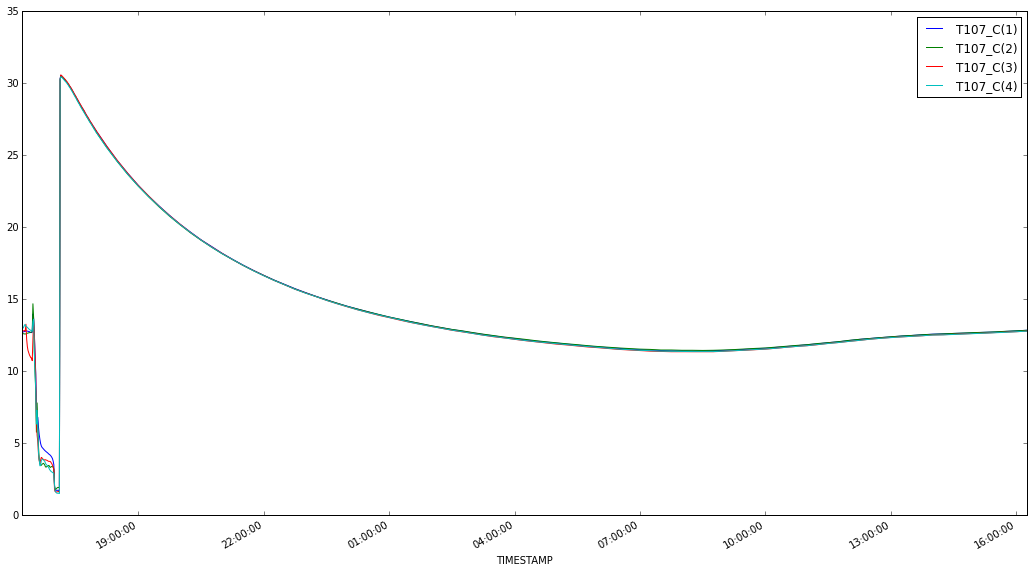

In [10]:
PotTemp107.plot(figsize=(18, 10))

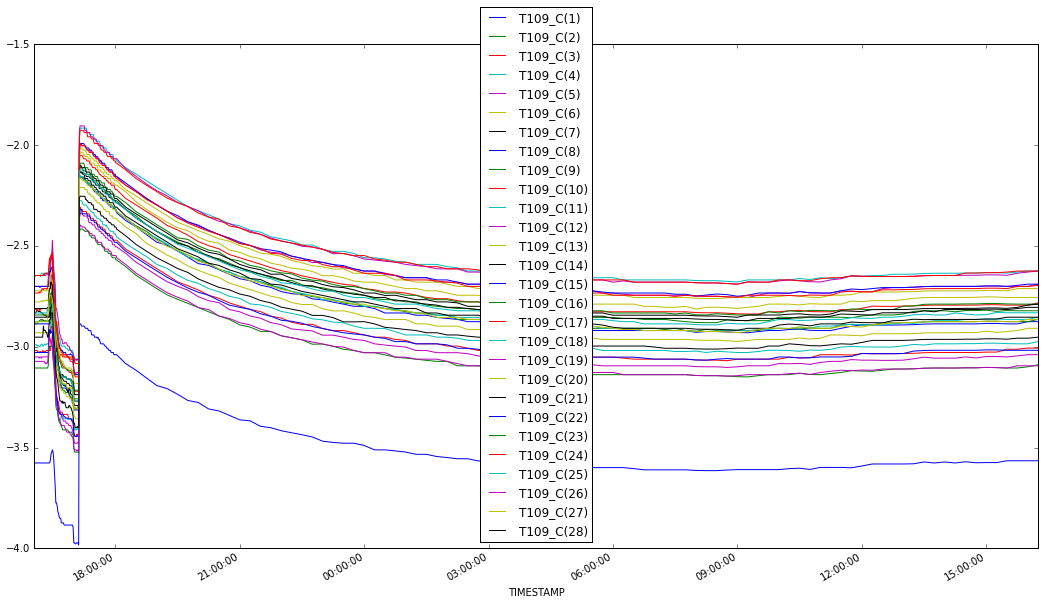

In [11]:
PotTemp109.plot(figsize=(18, 10))

##Determine coefficients for each sensor

In [12]:
#Set mean temperature to calibrate against
PotTemps[34] = (PotTemps.ix[:,32]+PotTemps.ix[:,31]+PotTemps.ix[:,30]+PotTemps.ix[:,29])/4

In [13]:
#Set up blank dataframe to store sensor coefficients
SensorLables = pd.Series(PotTemp109.columns,name='Sensor')
SensorLables
SensorCoefficients = pd.DataFrame(0,index=SensorLables,columns=['Slope','Intercept'])                         

In [19]:
Regres.params

const         88.436848
T109_C(28)    25.712291
dtype: float64

C:\Anaconda\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


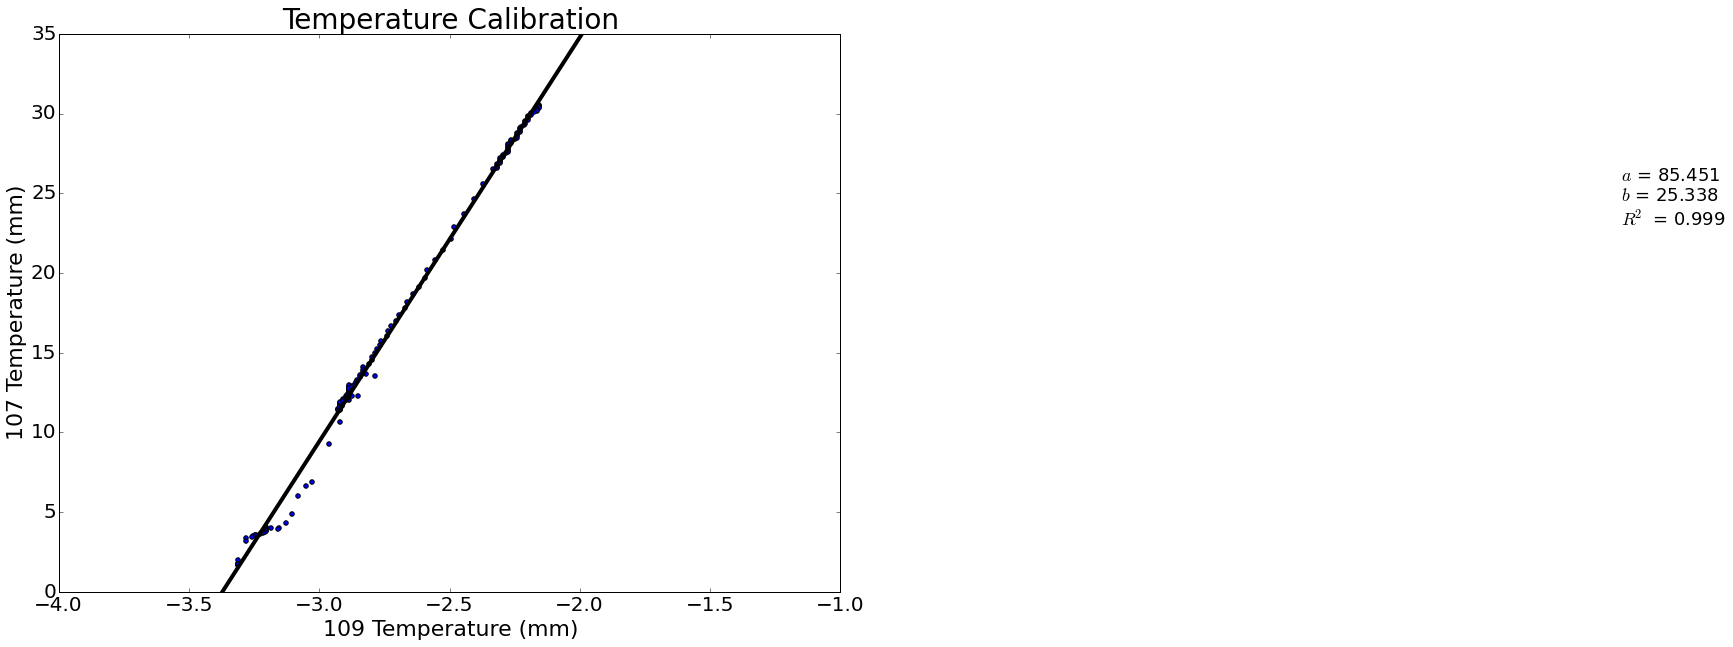

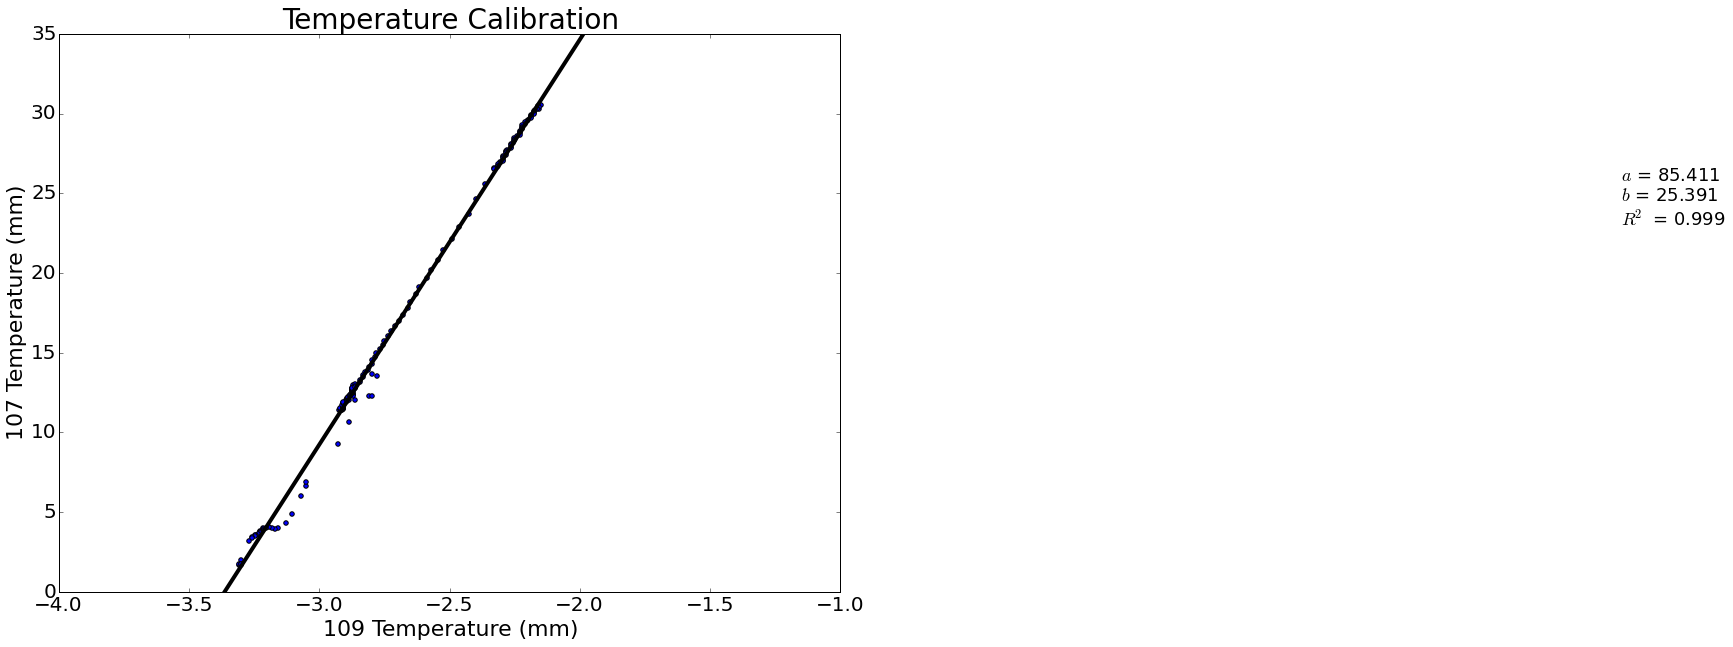

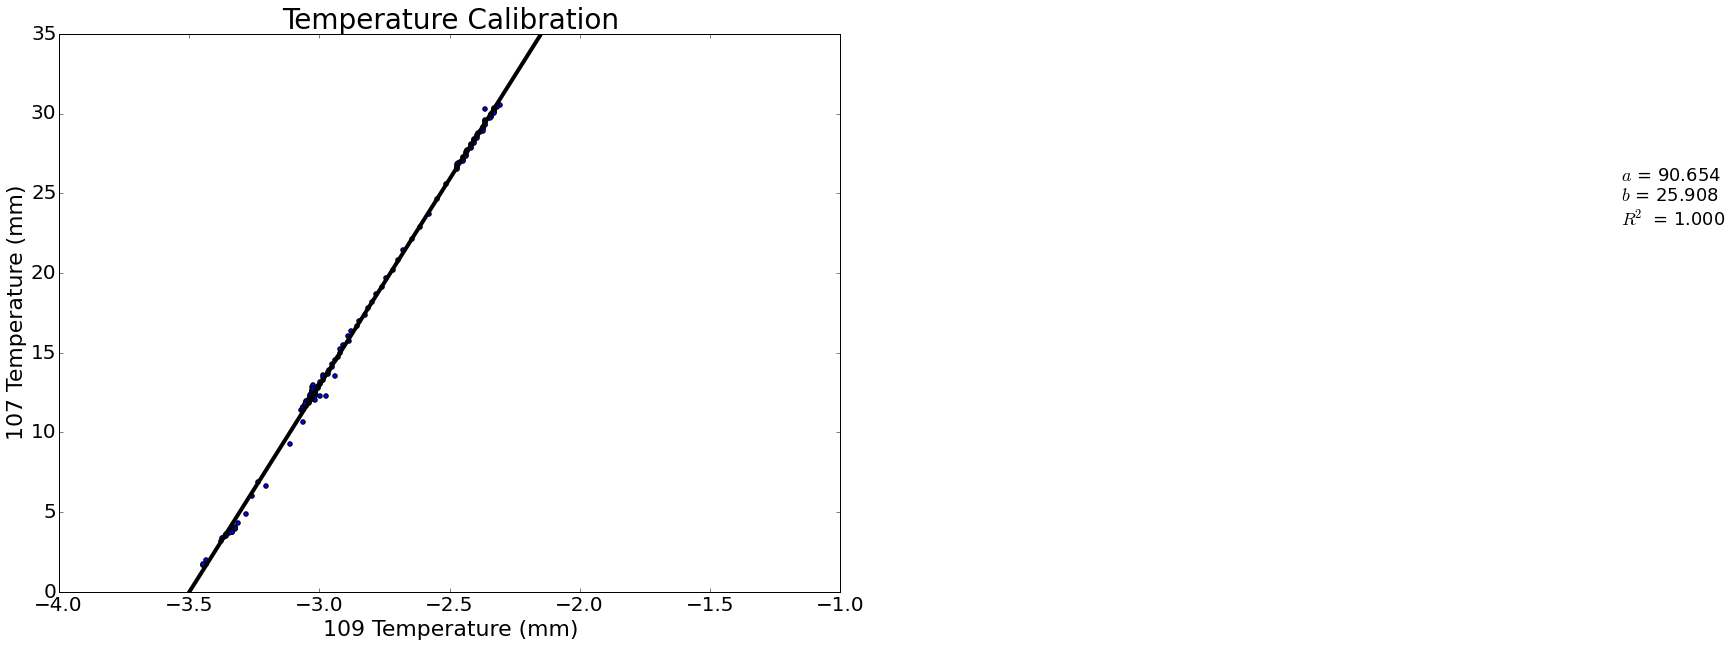

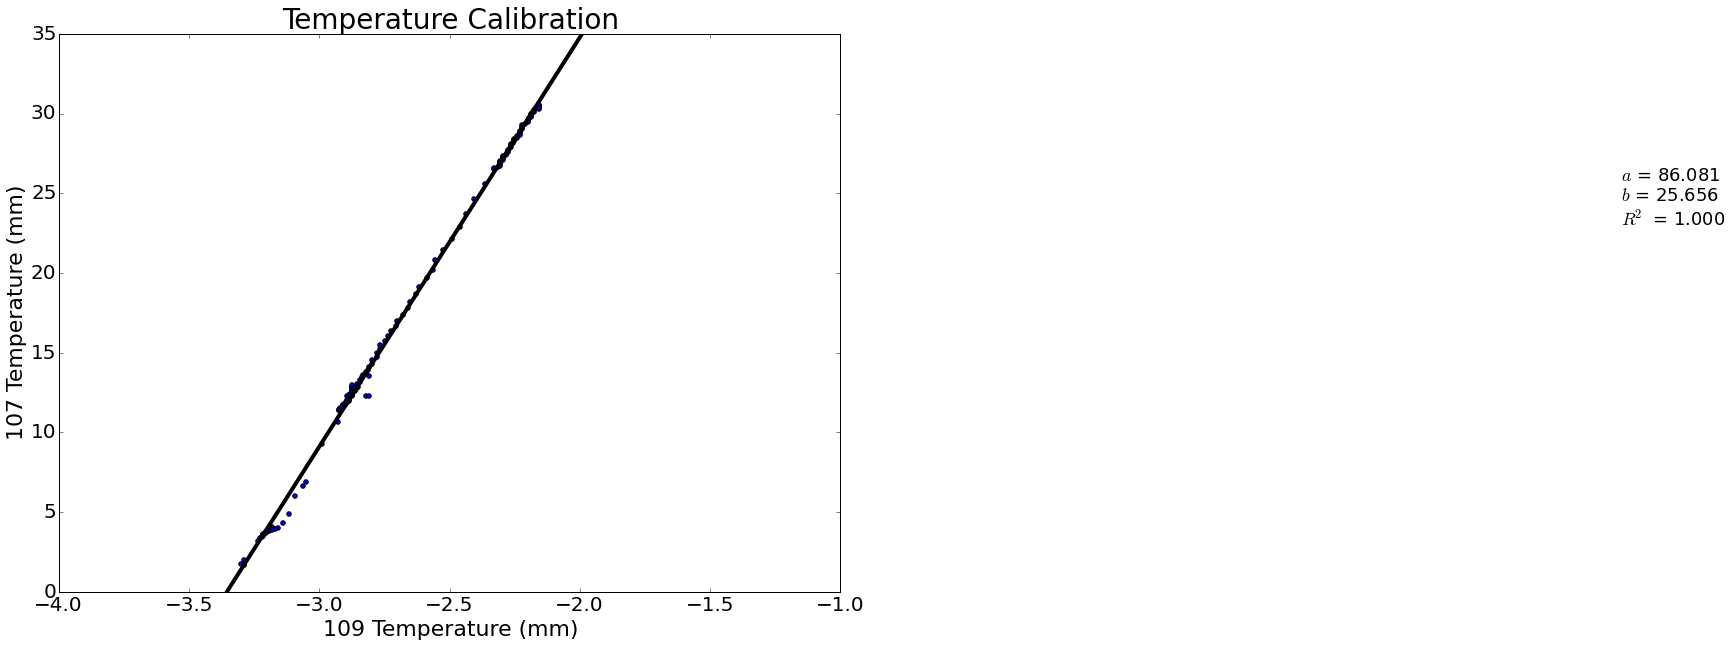

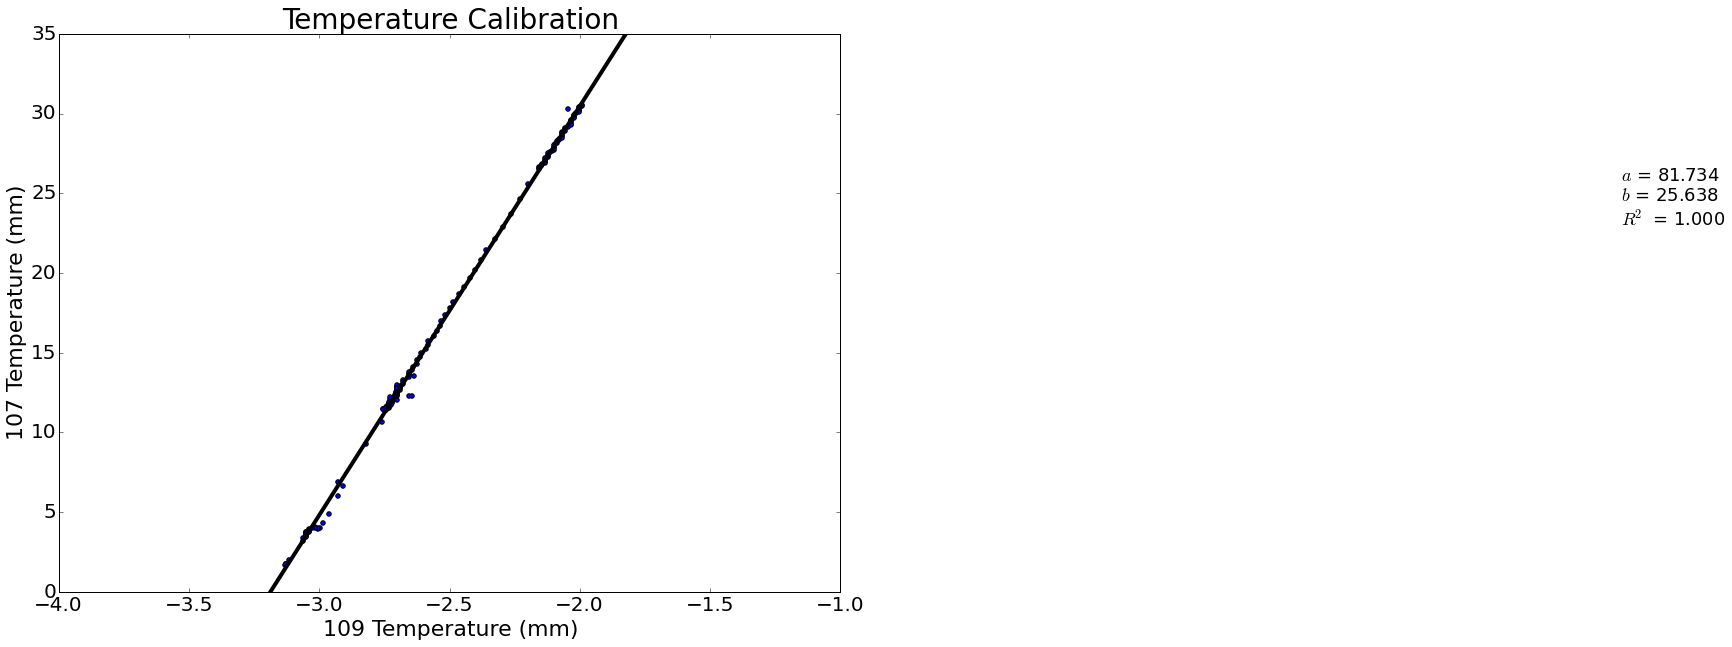

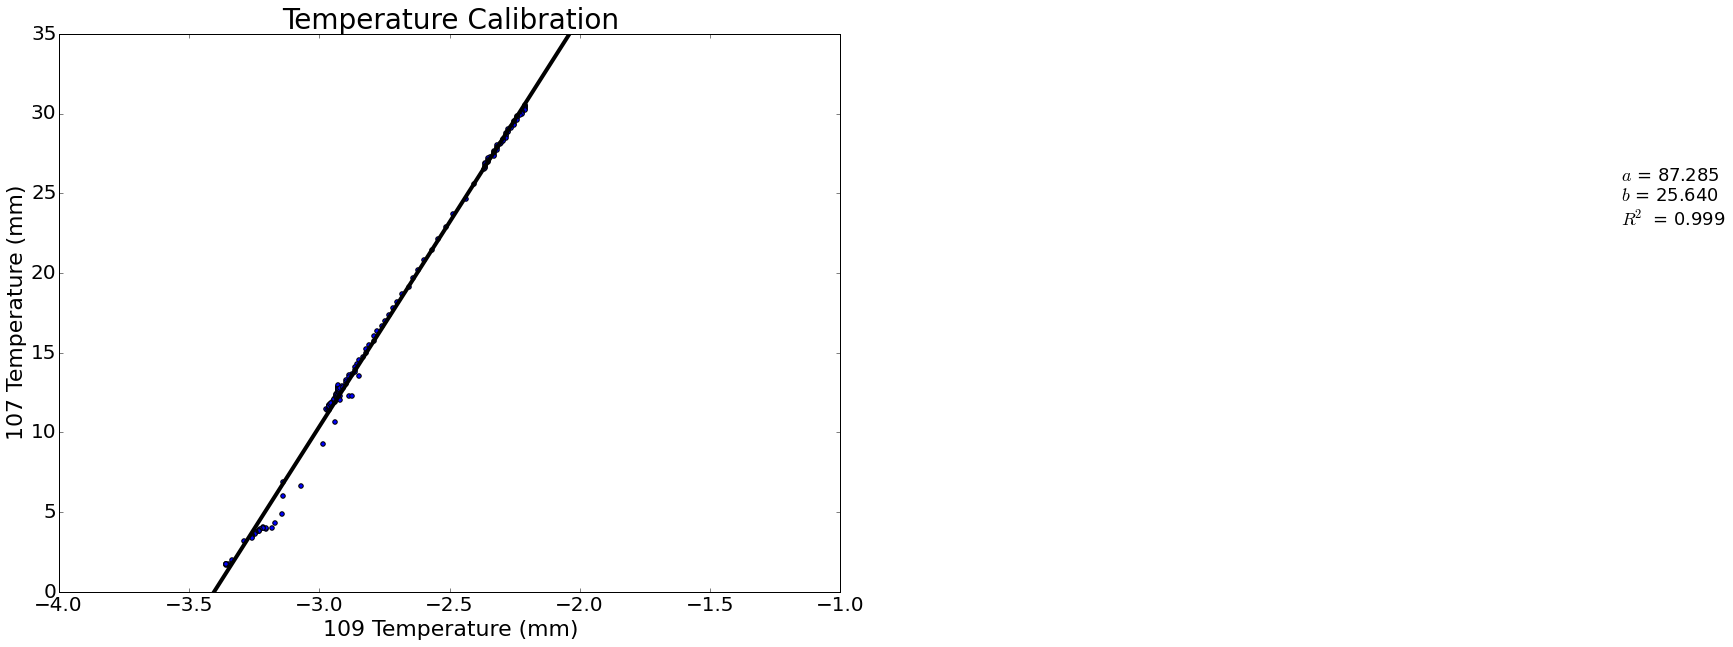

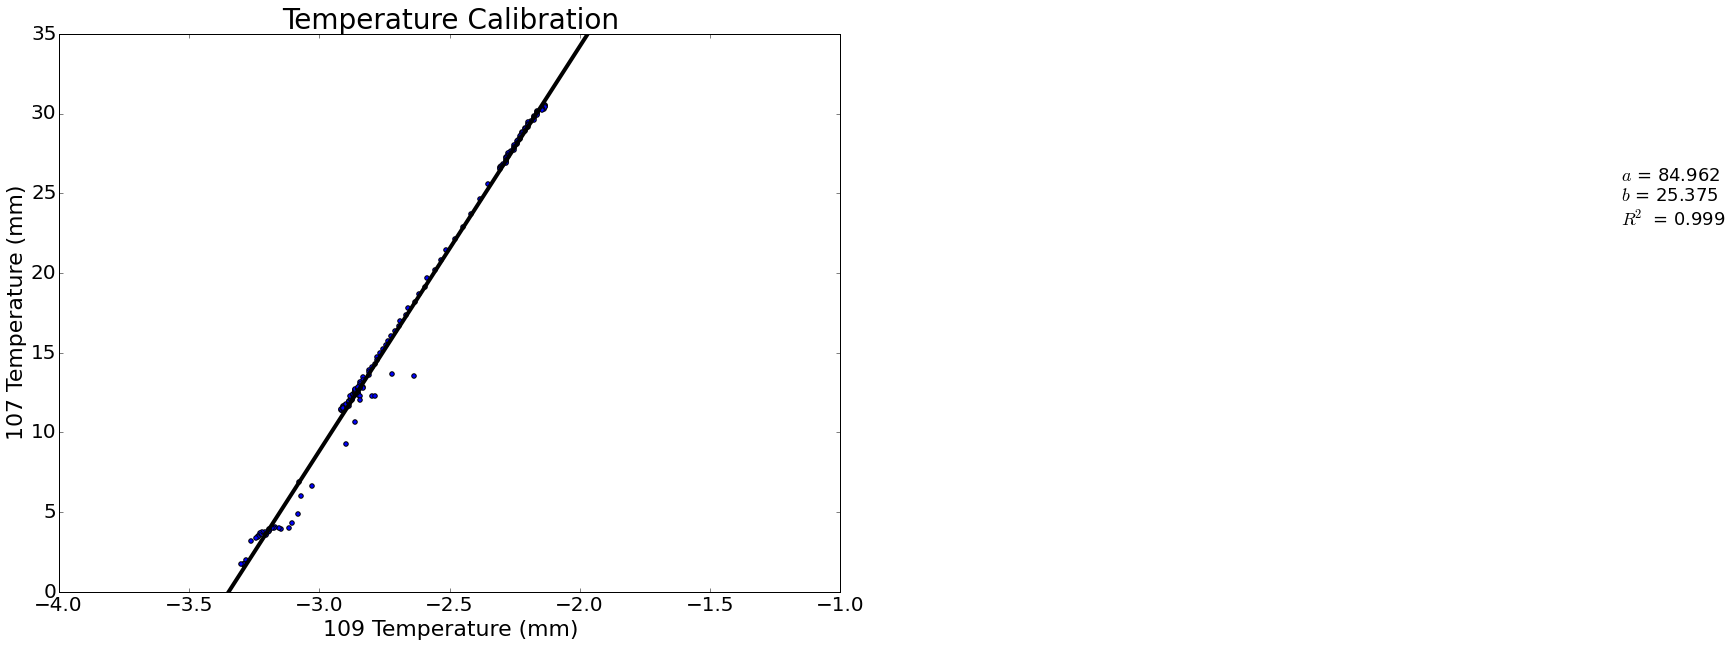

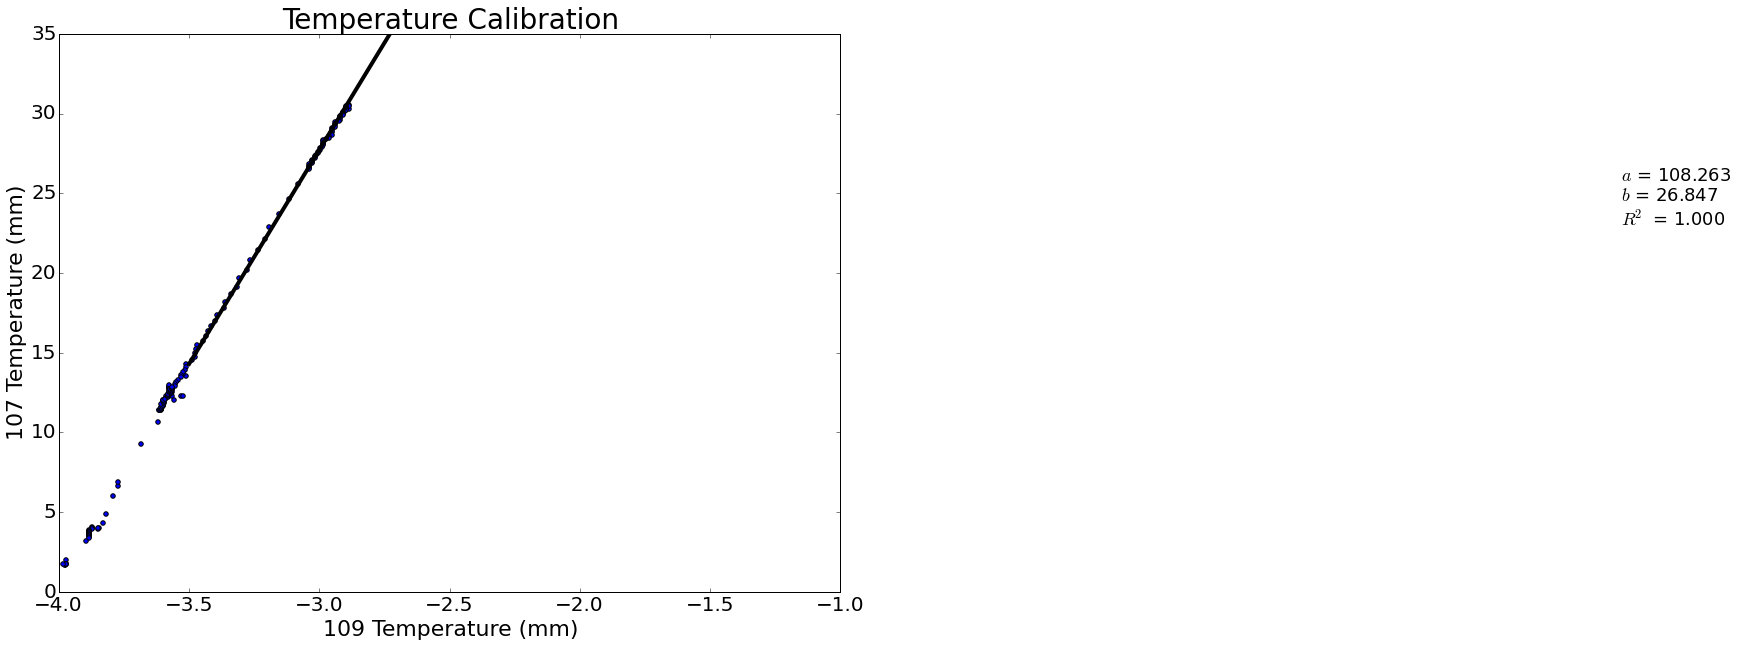

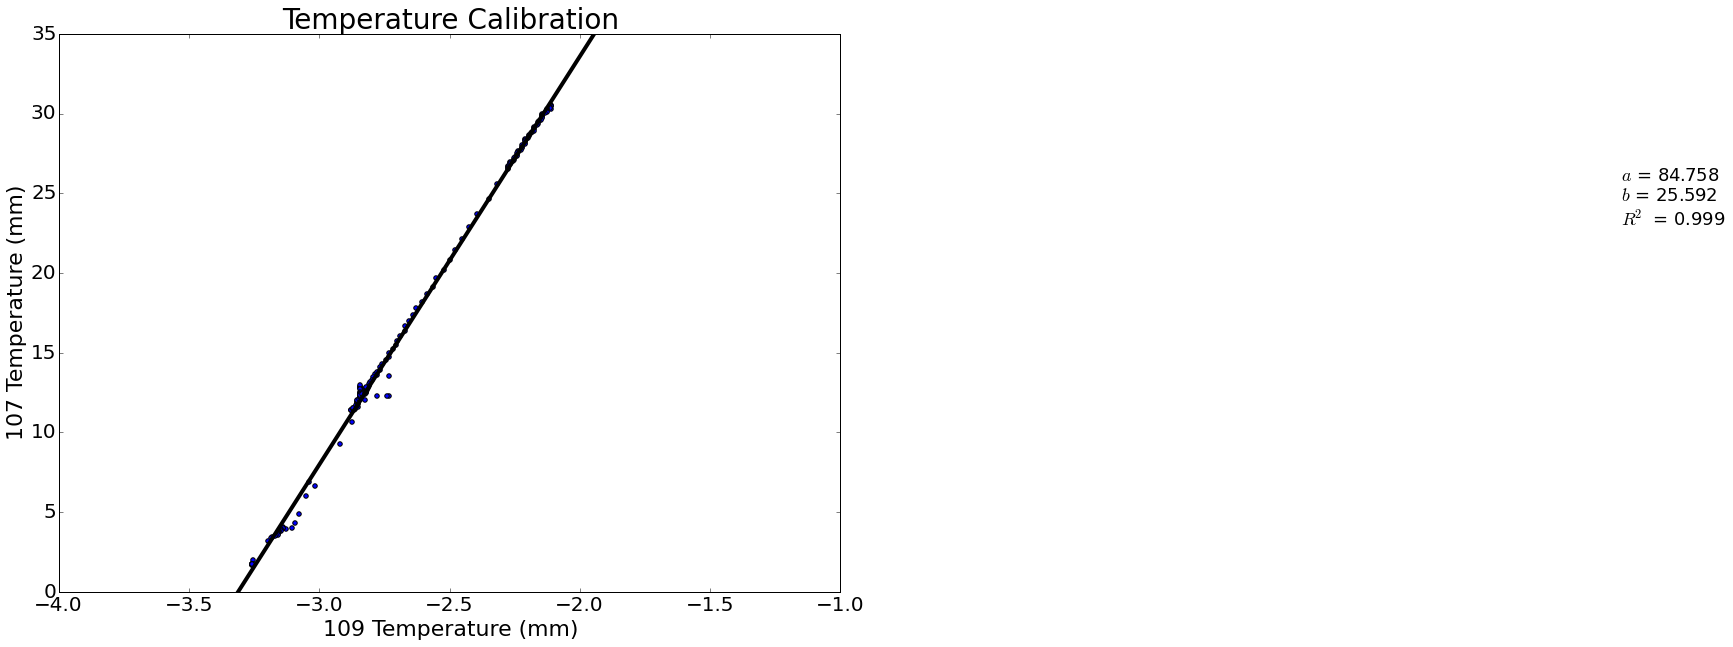

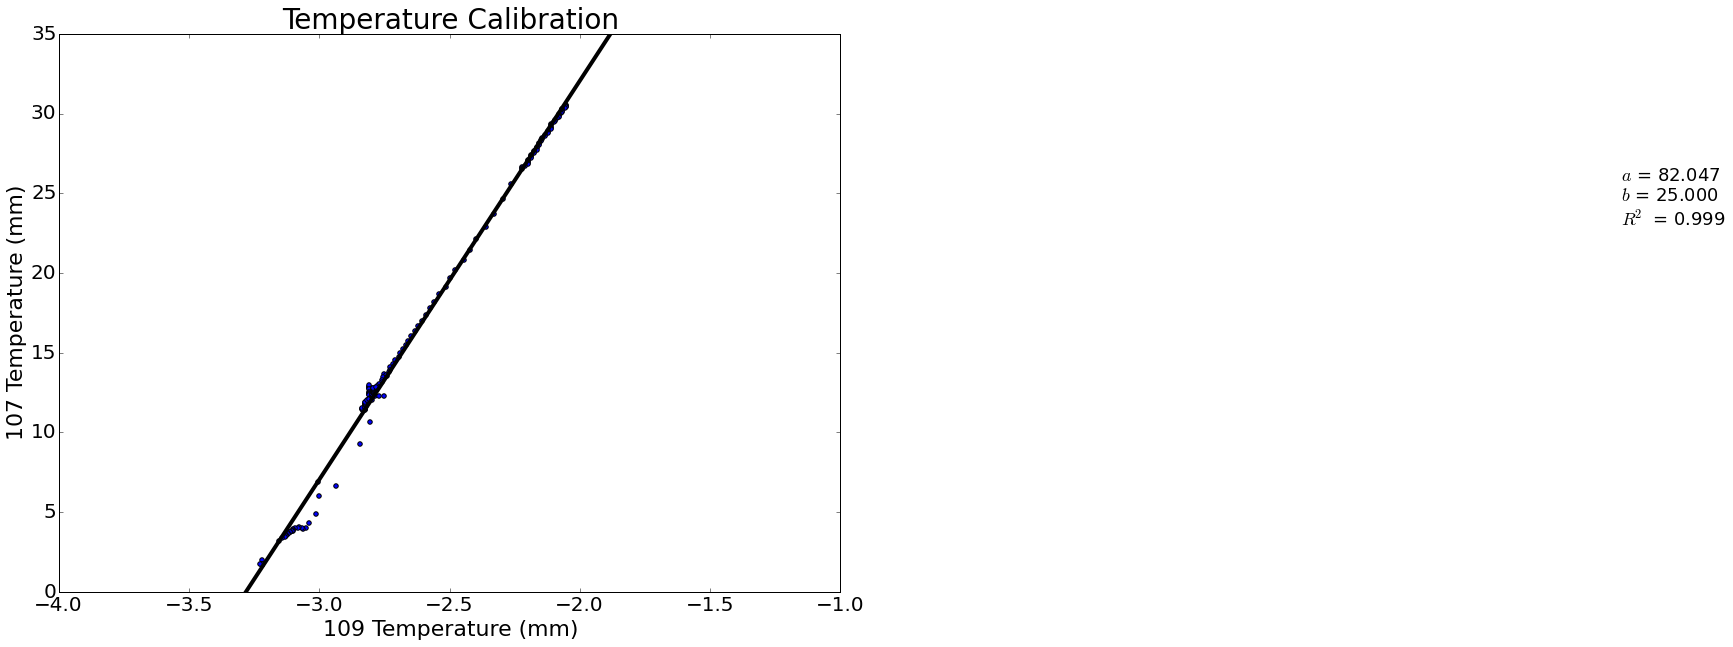

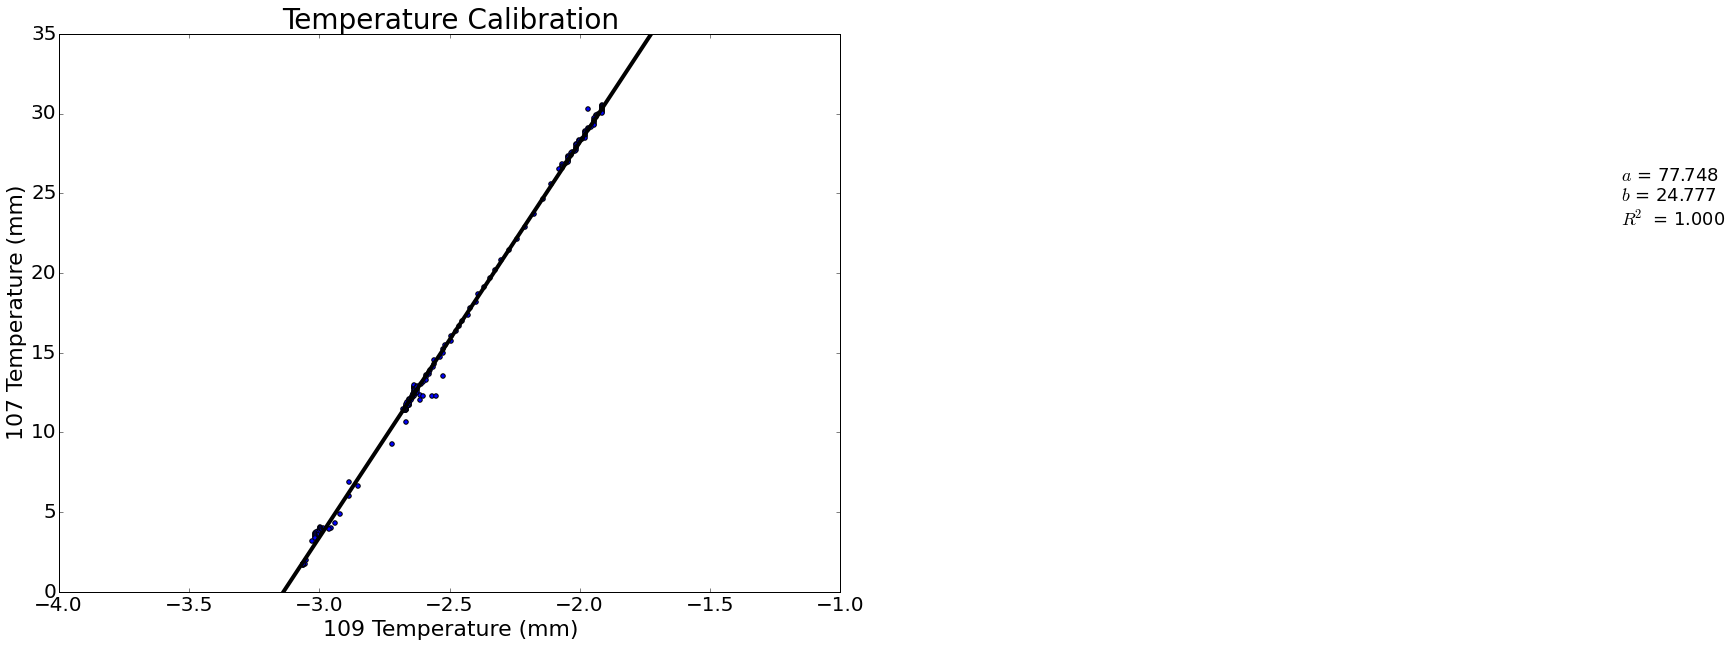

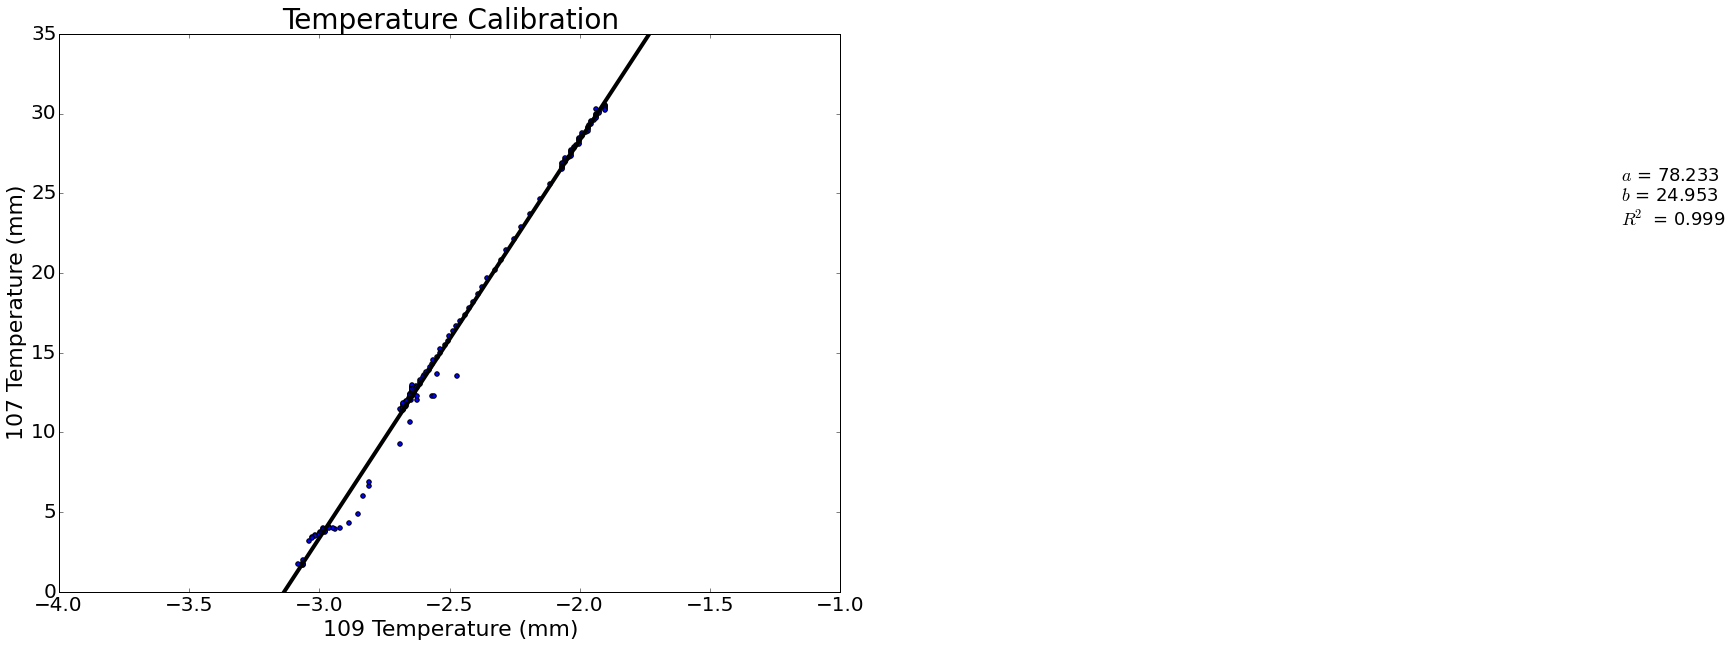

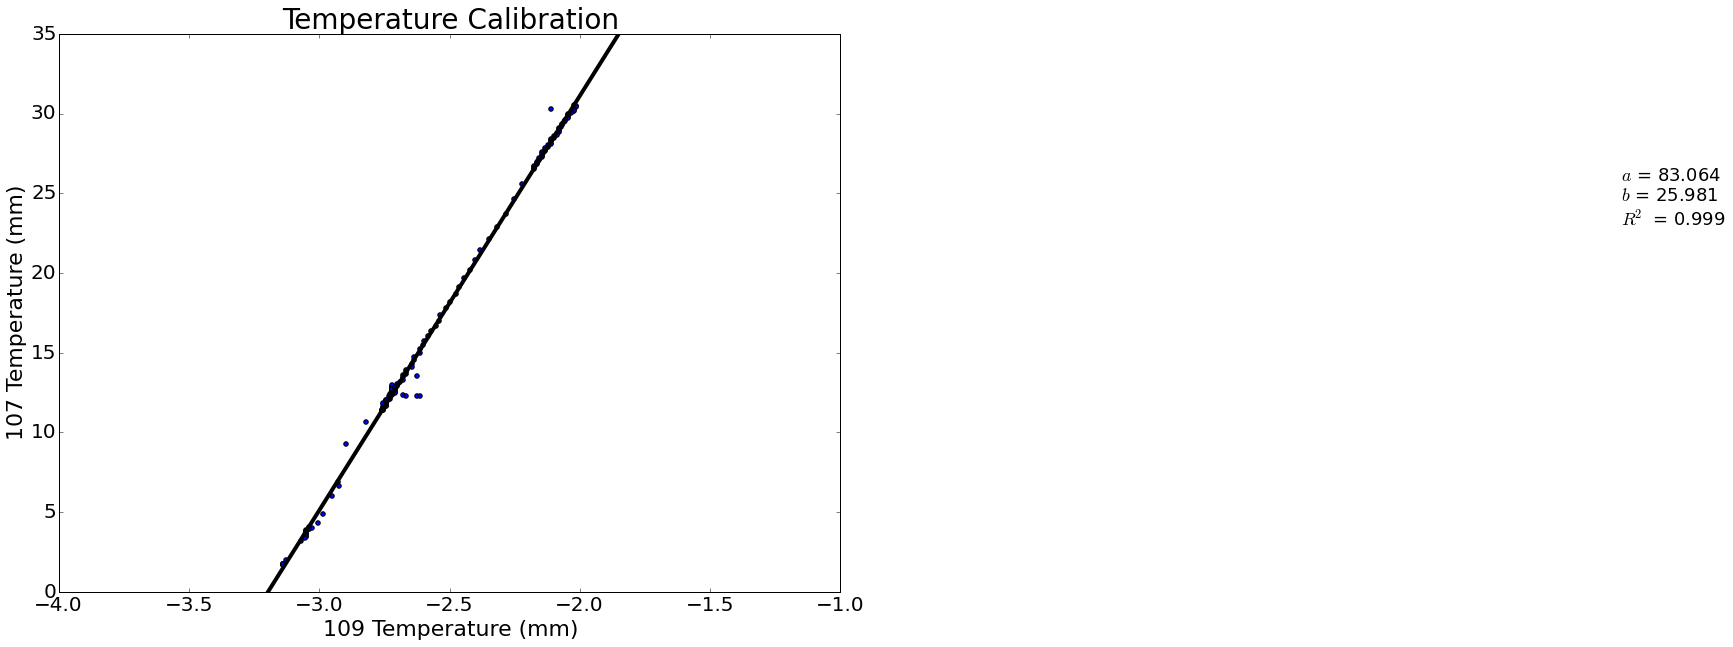

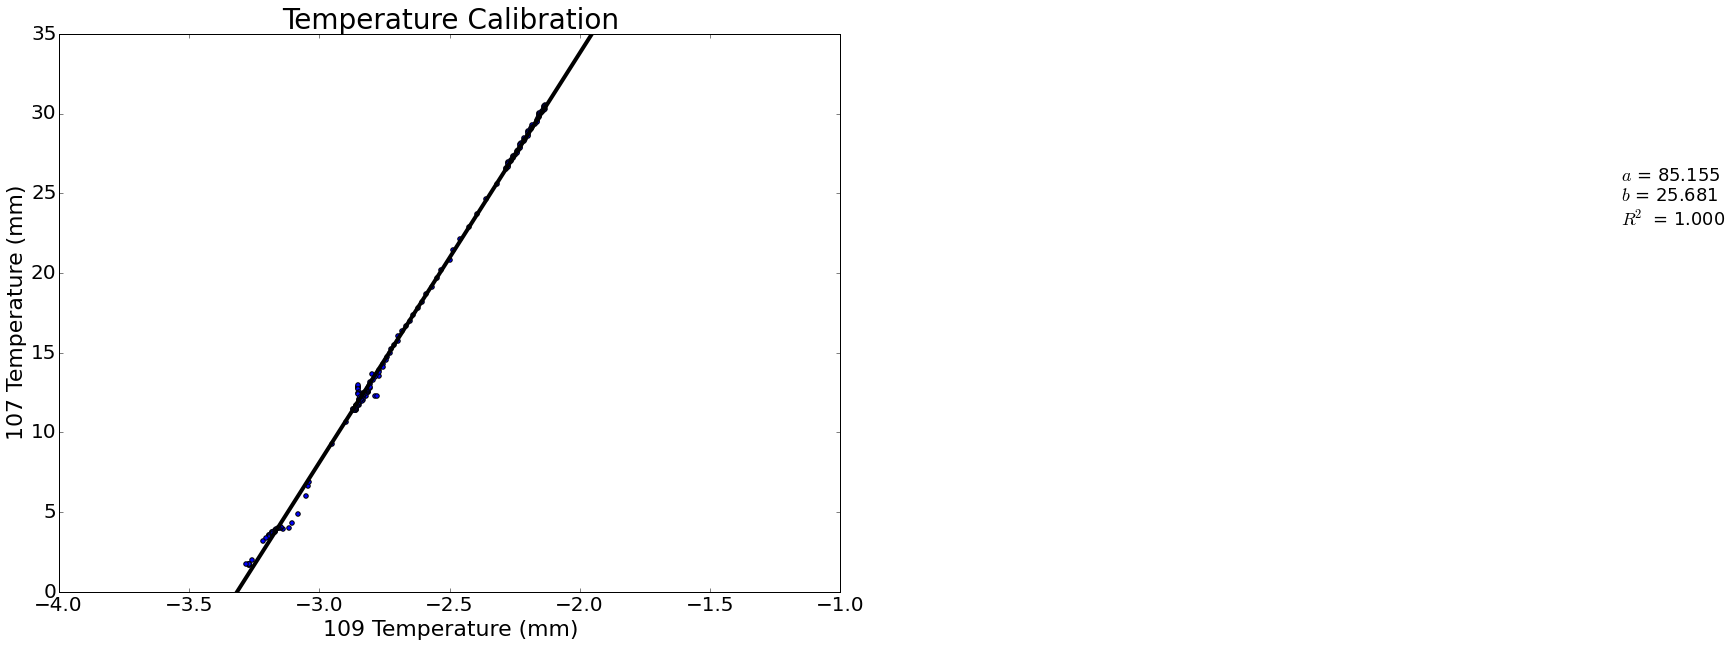

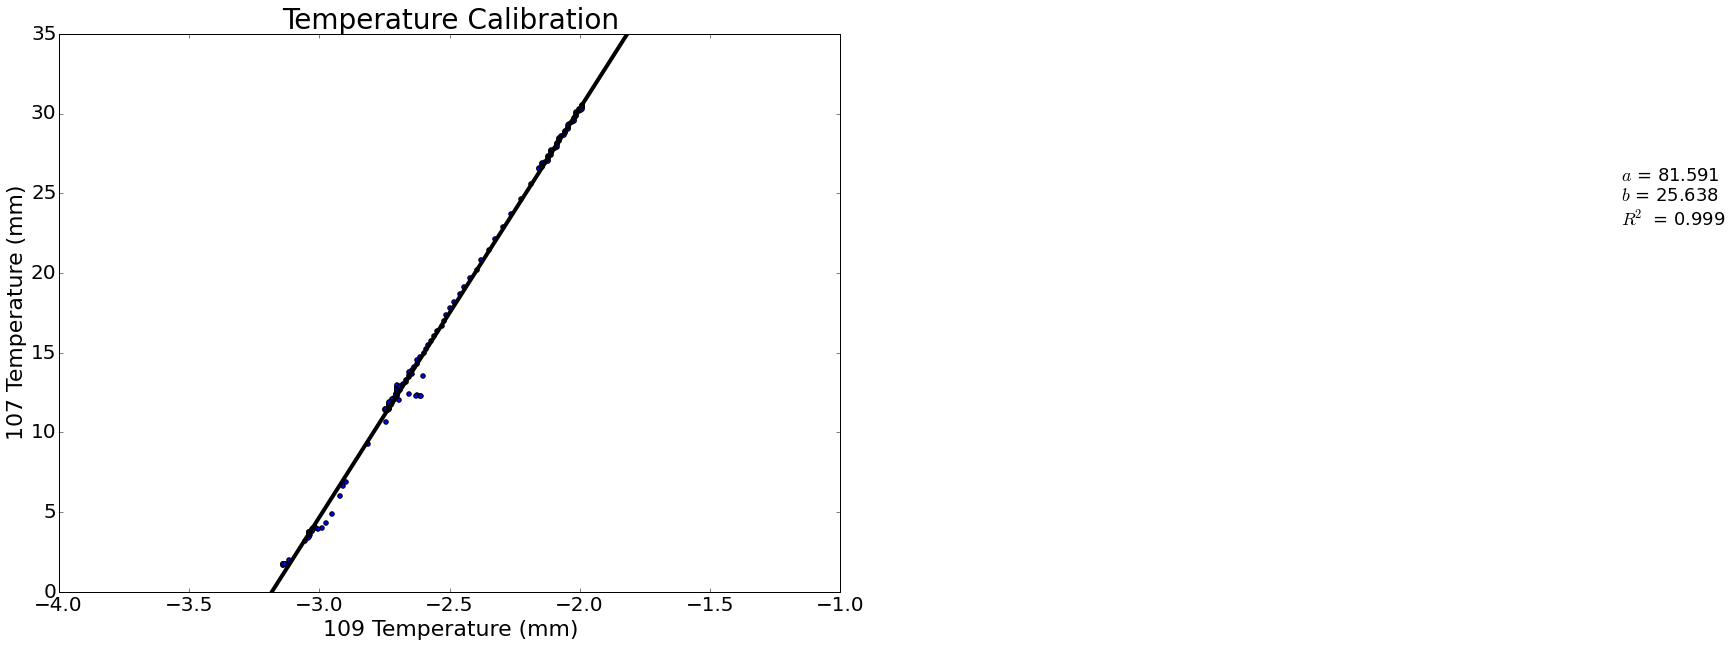

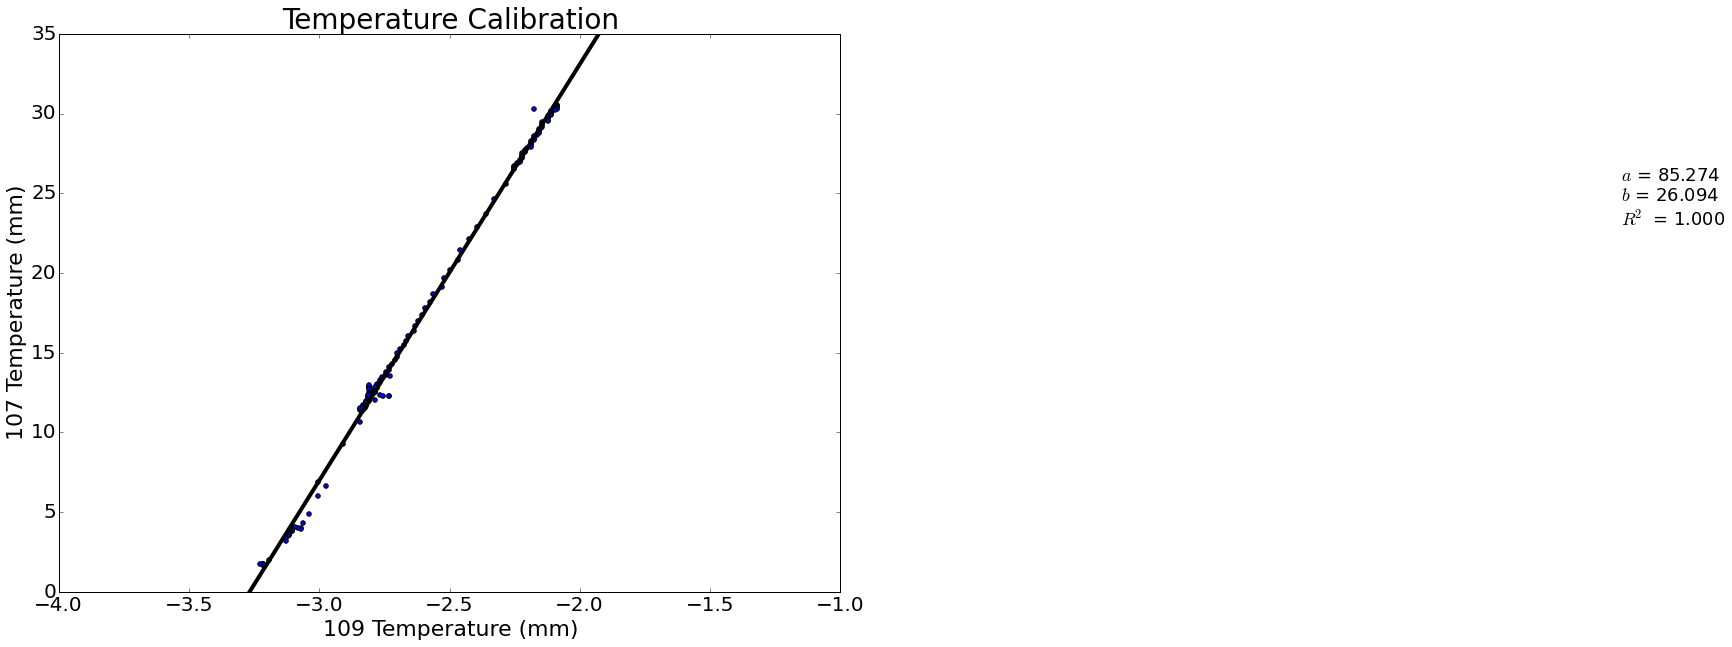

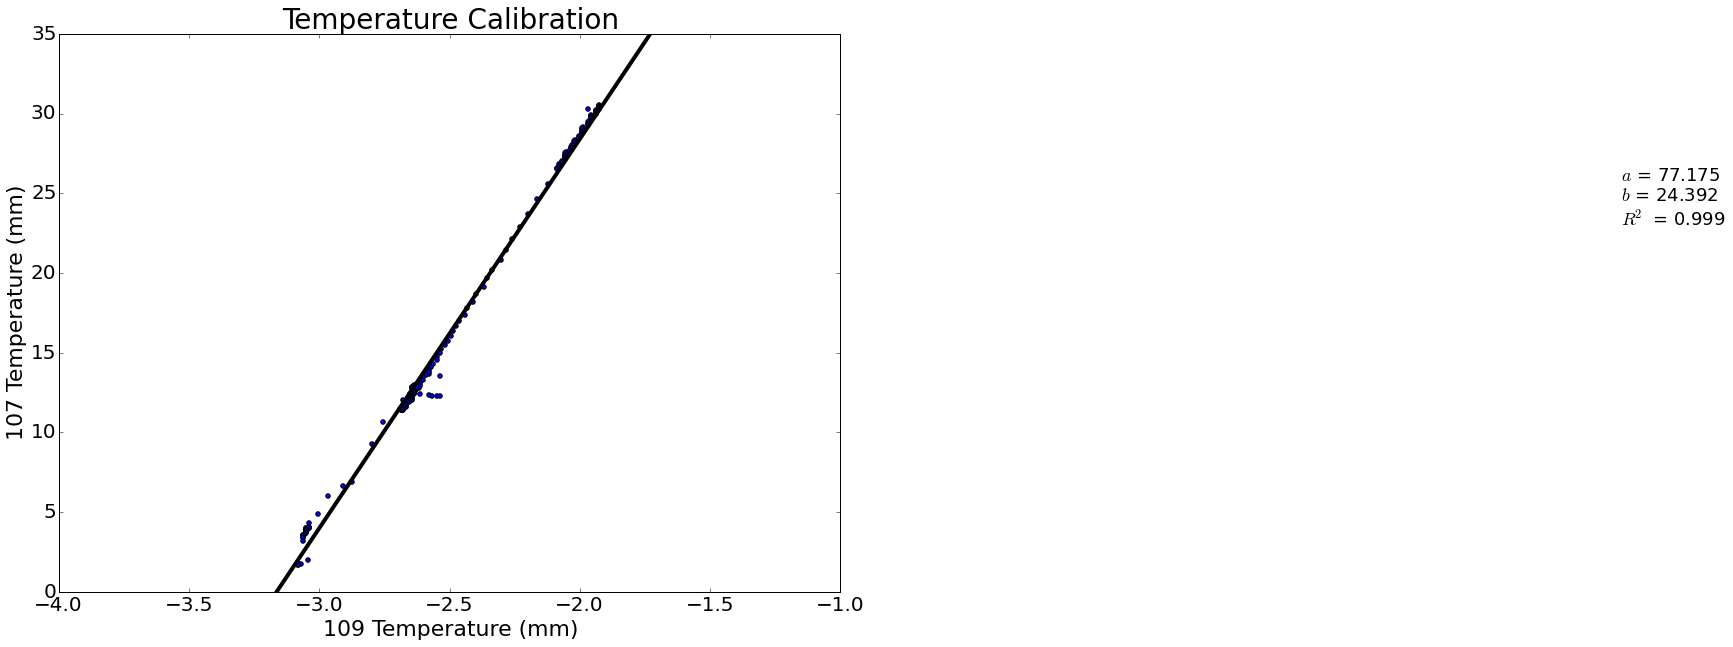

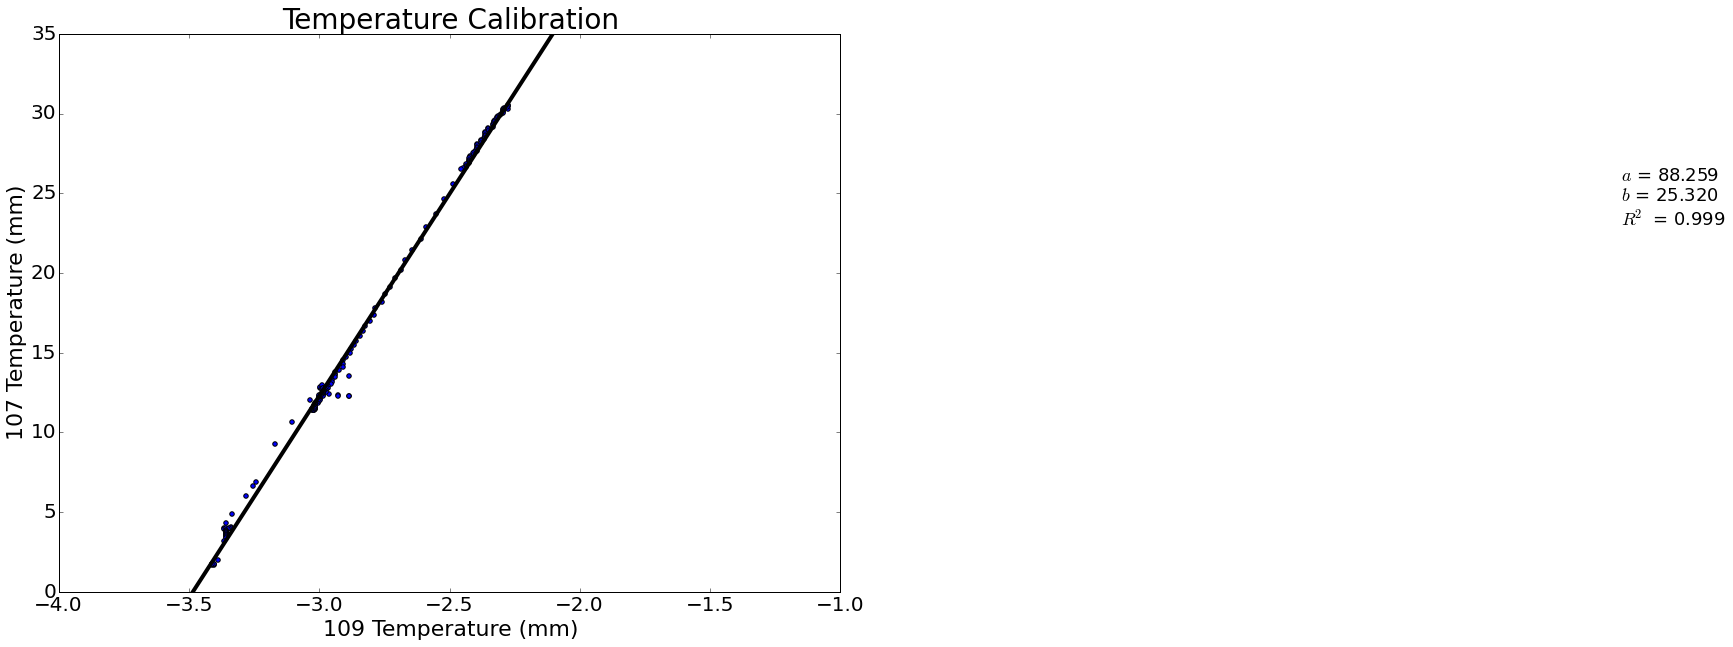

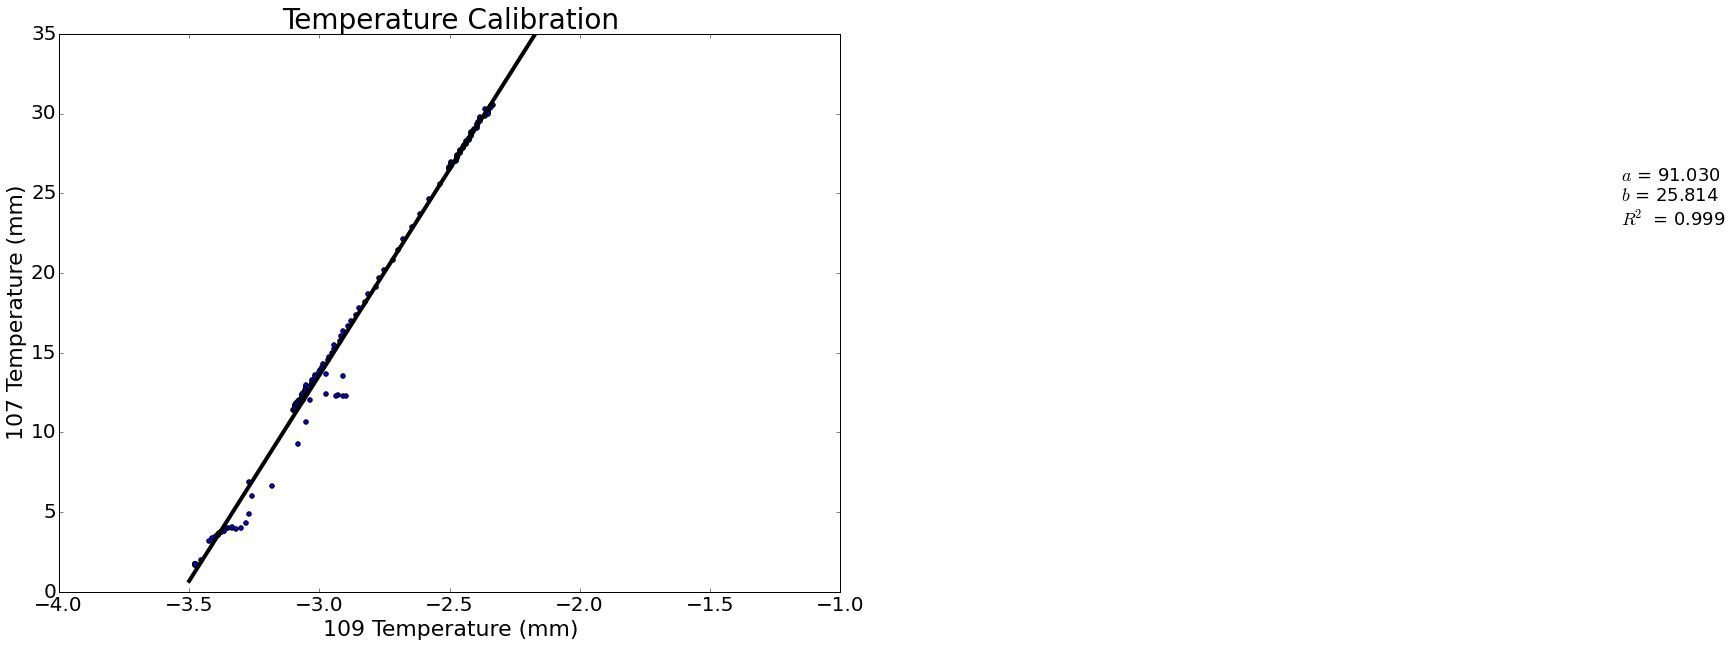

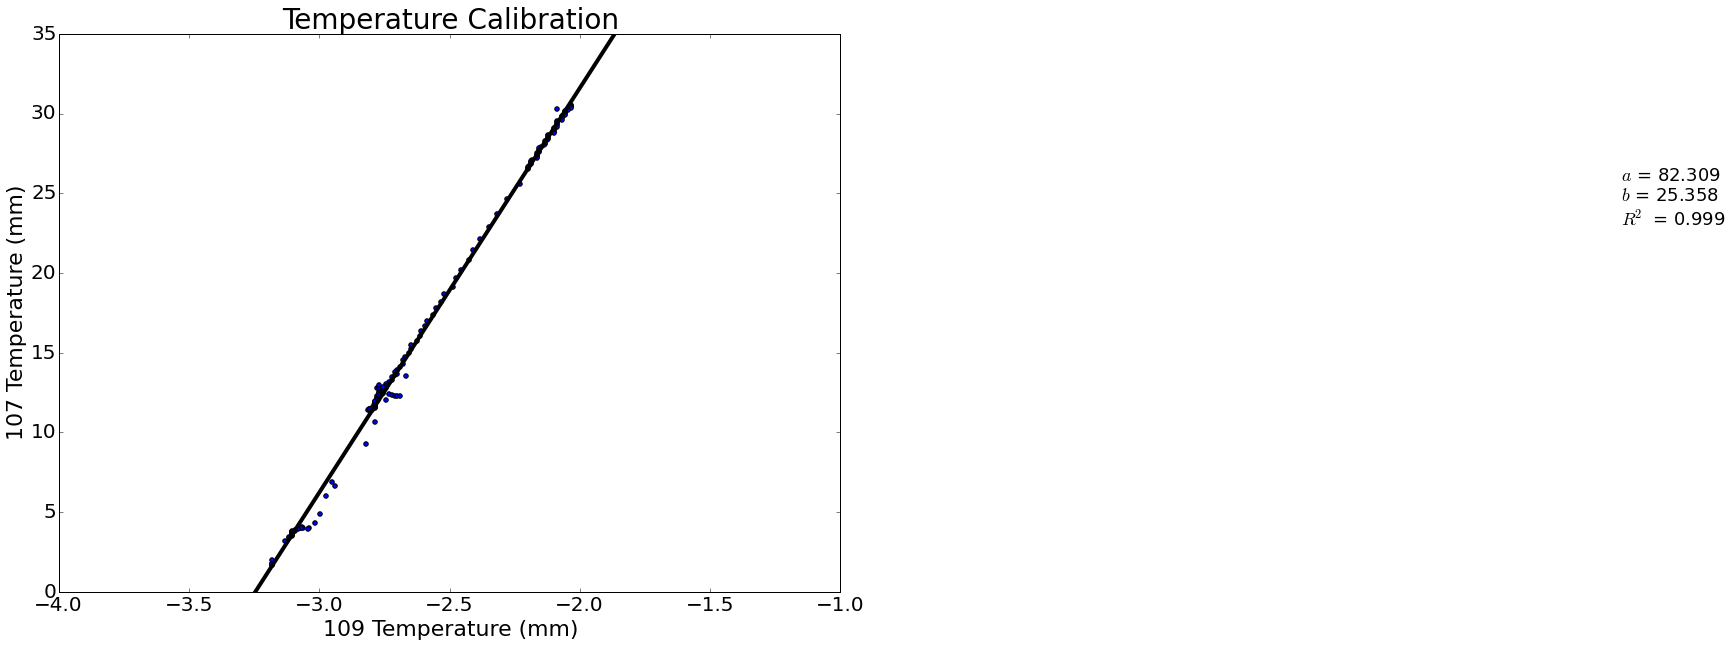

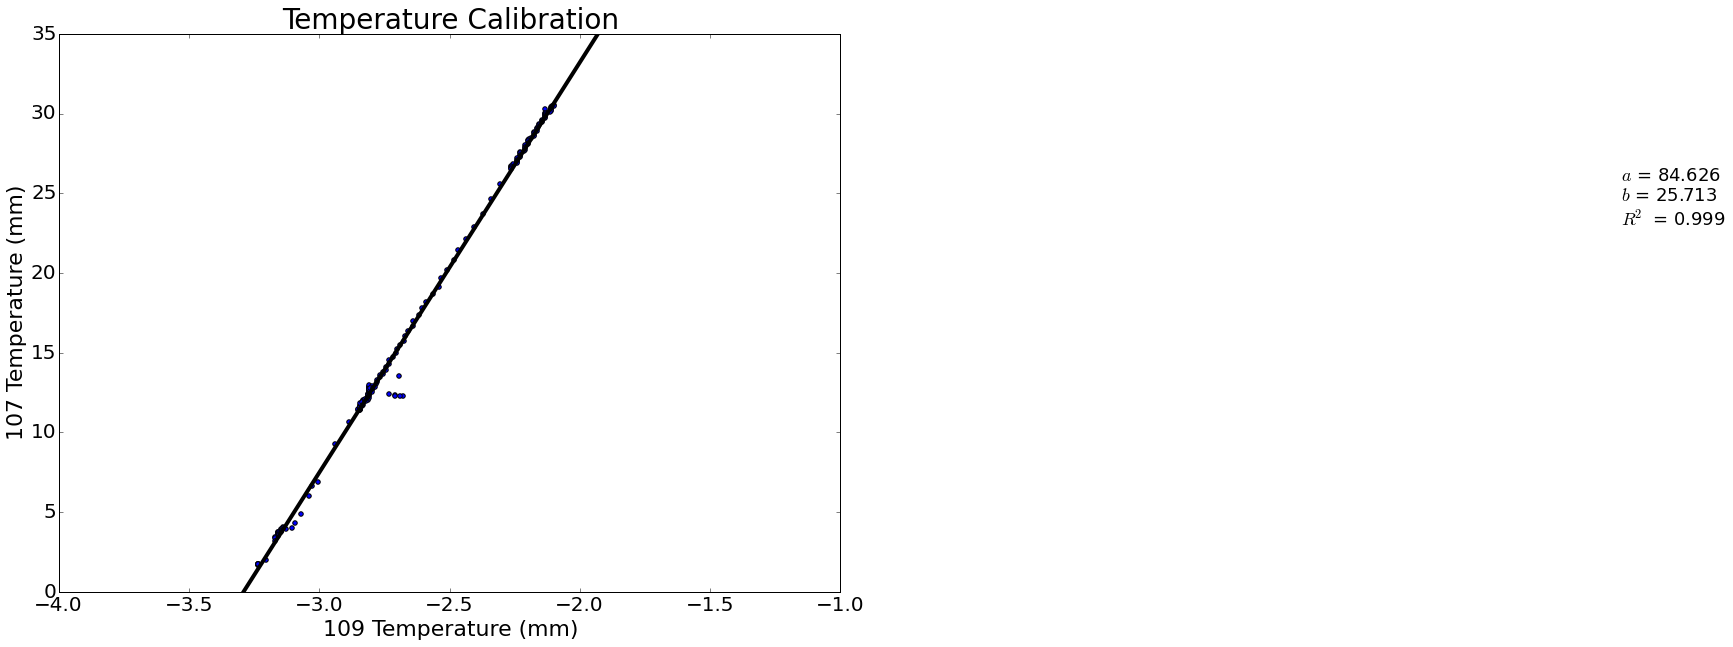

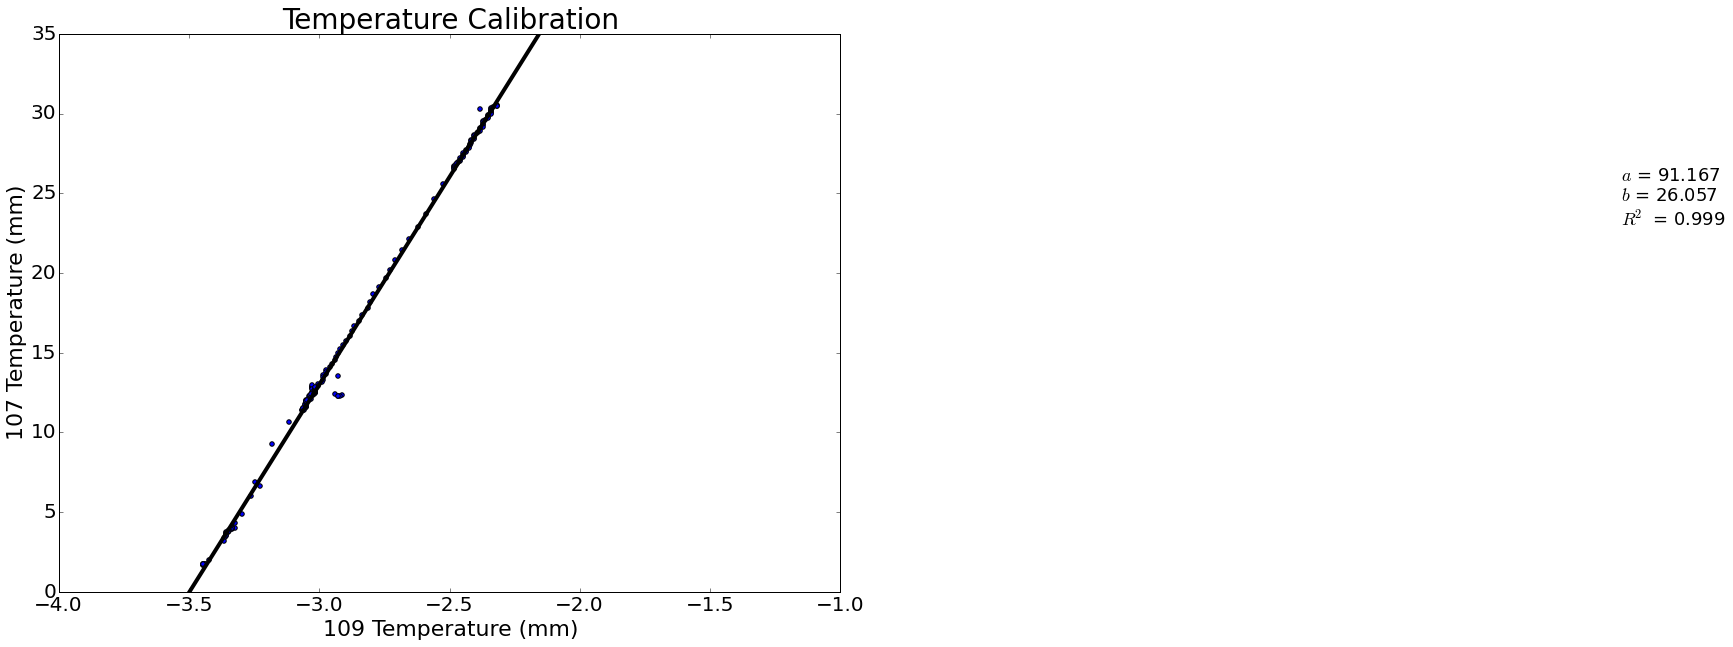

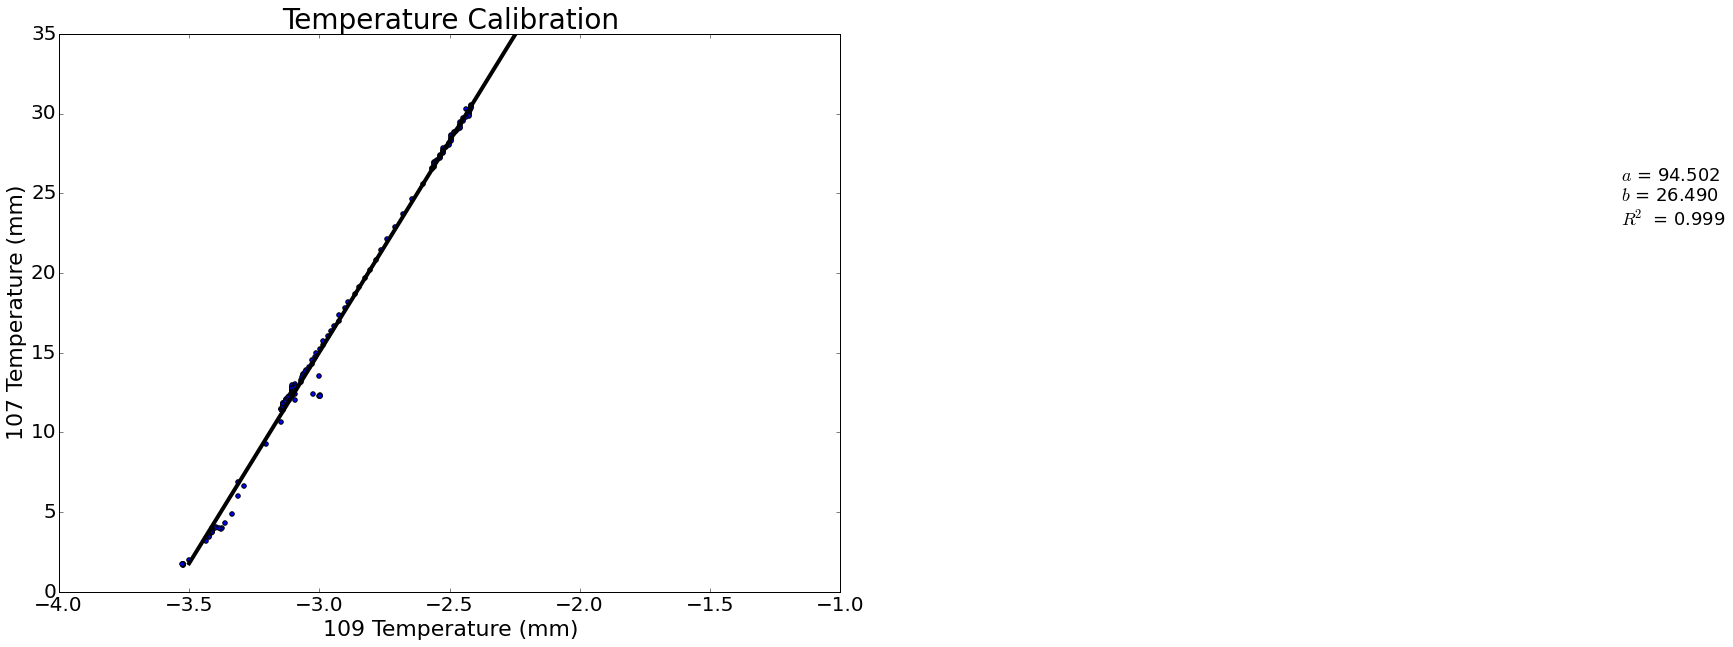

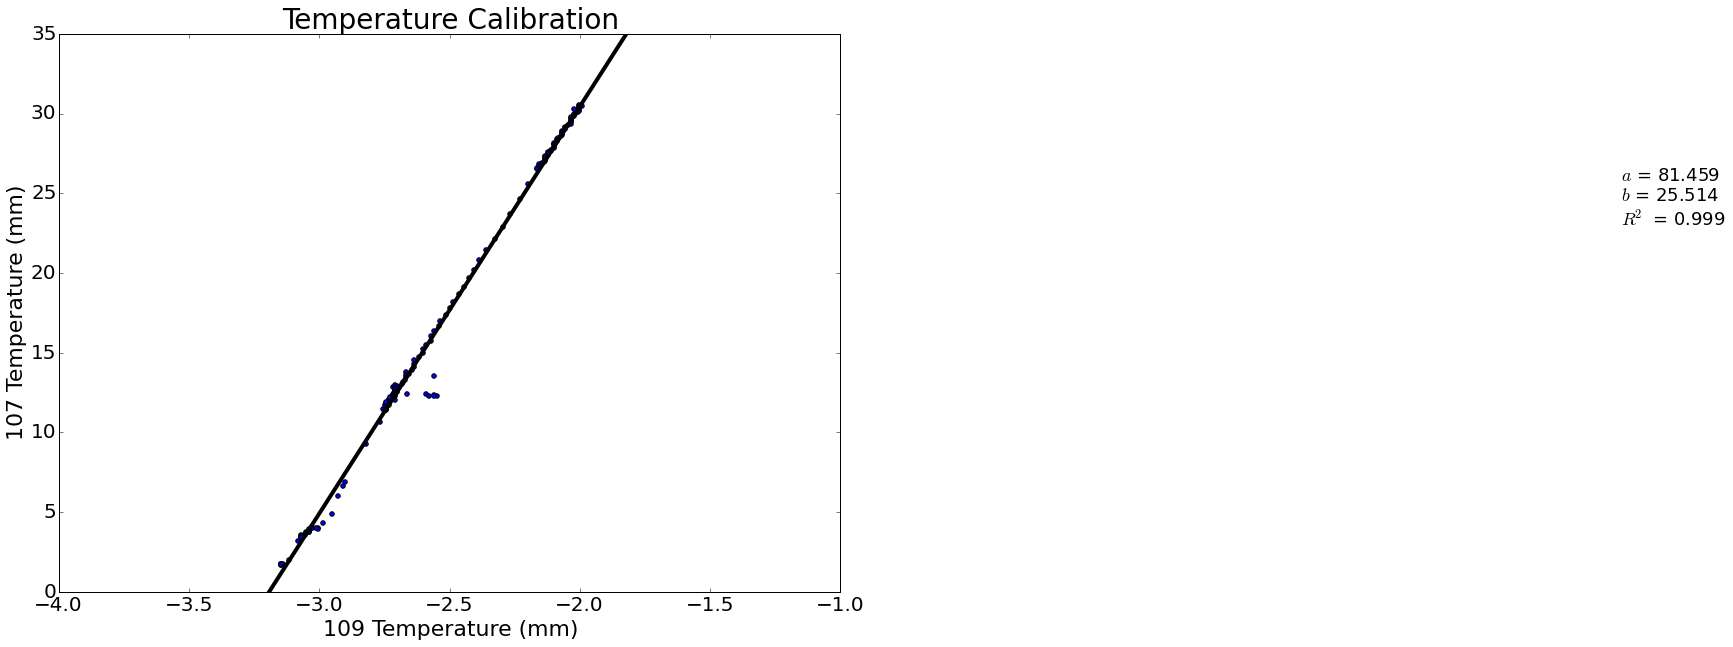

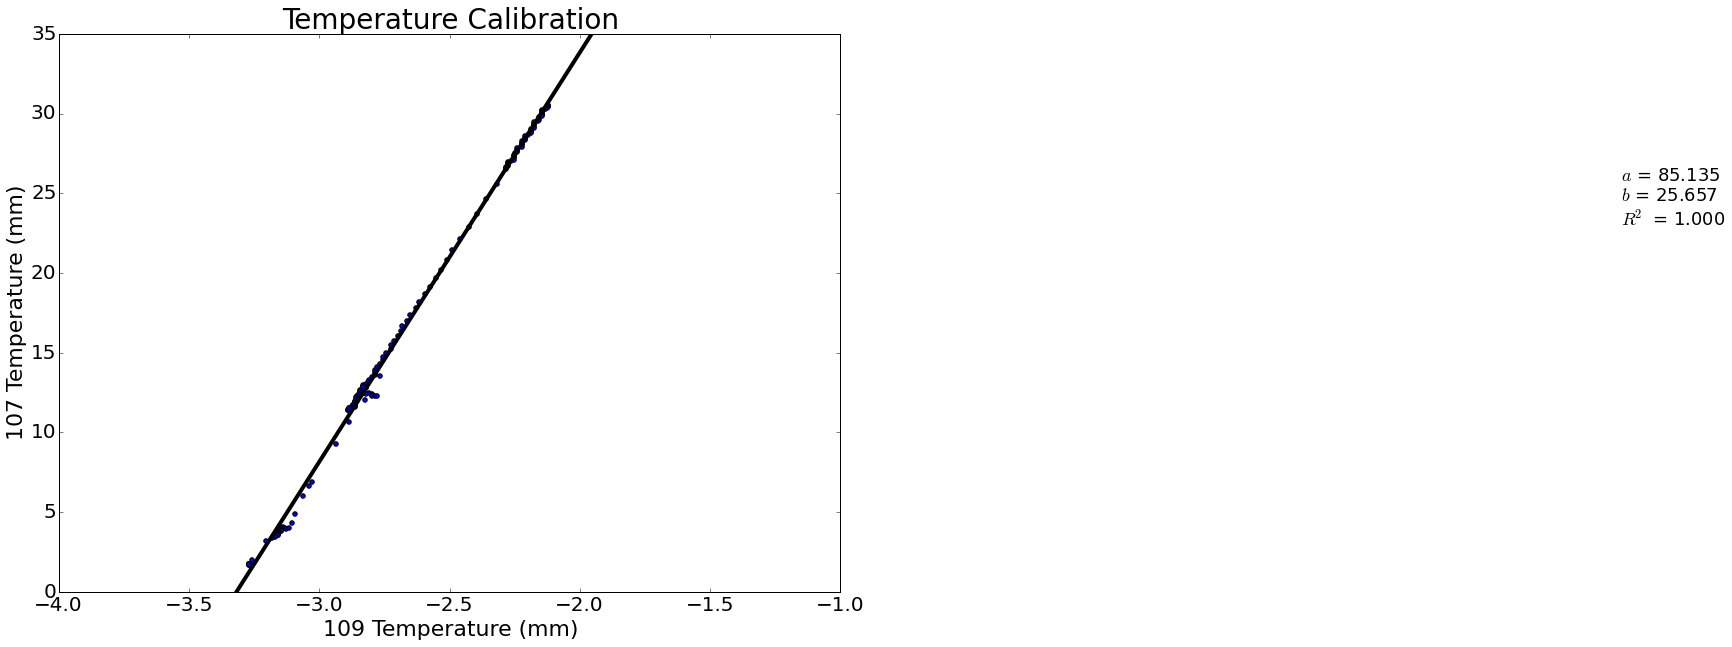

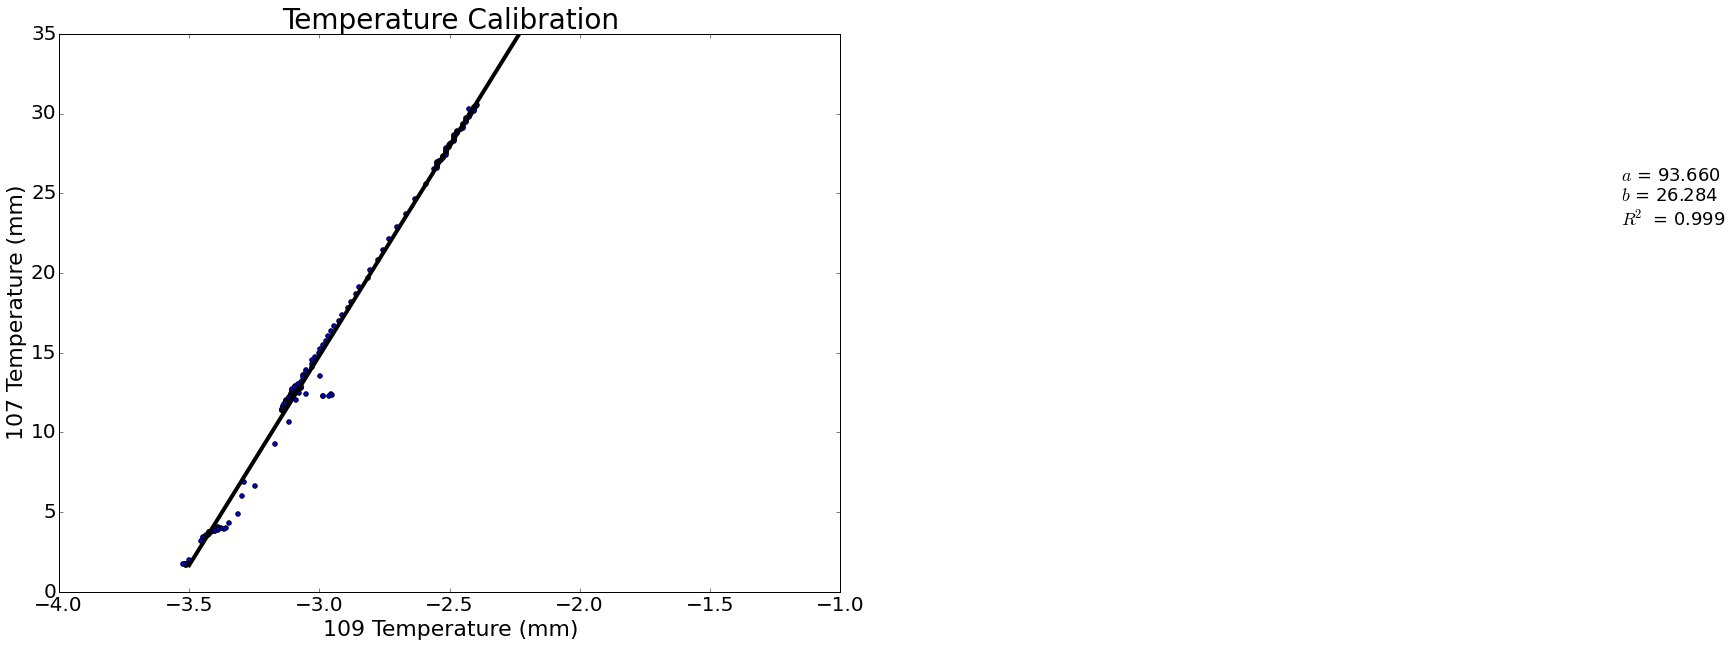

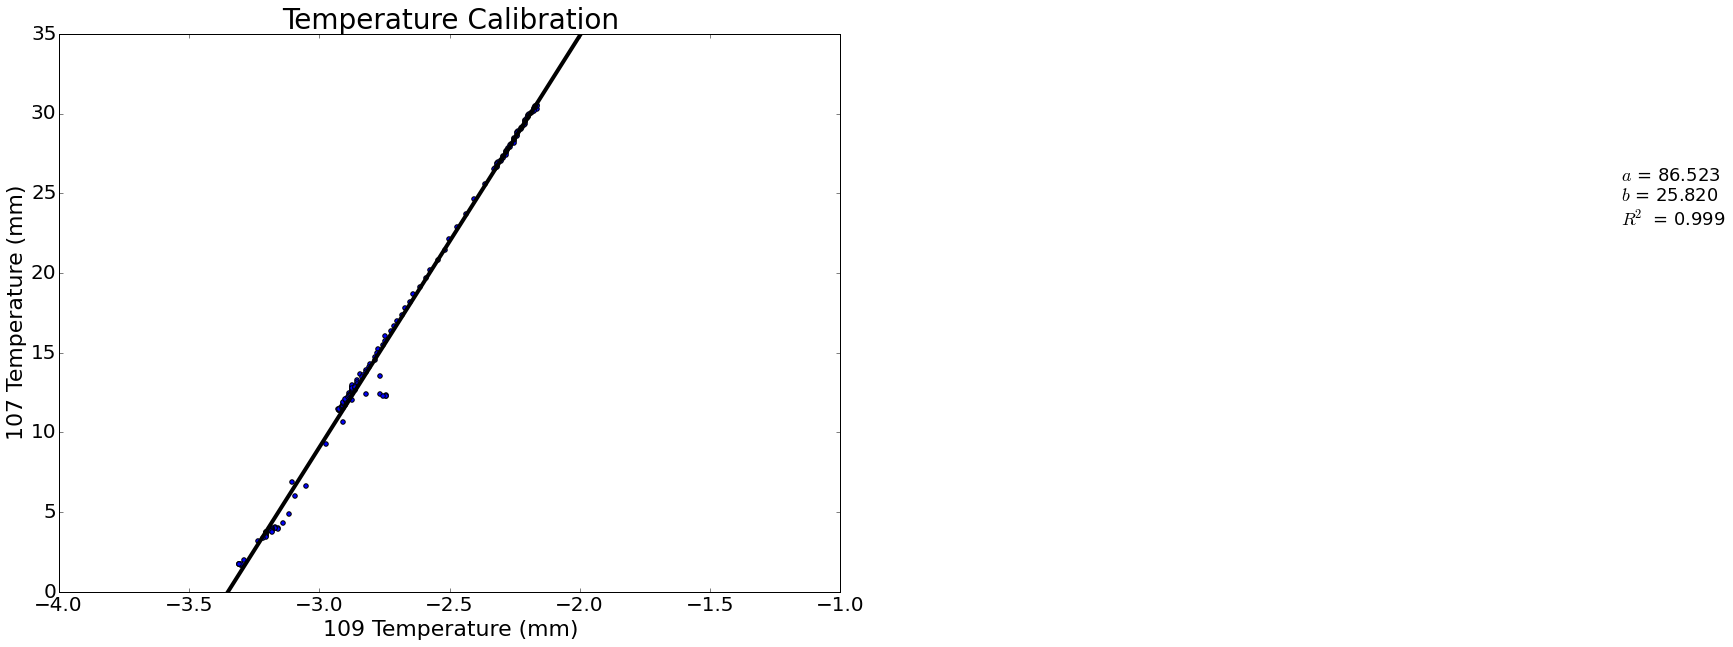

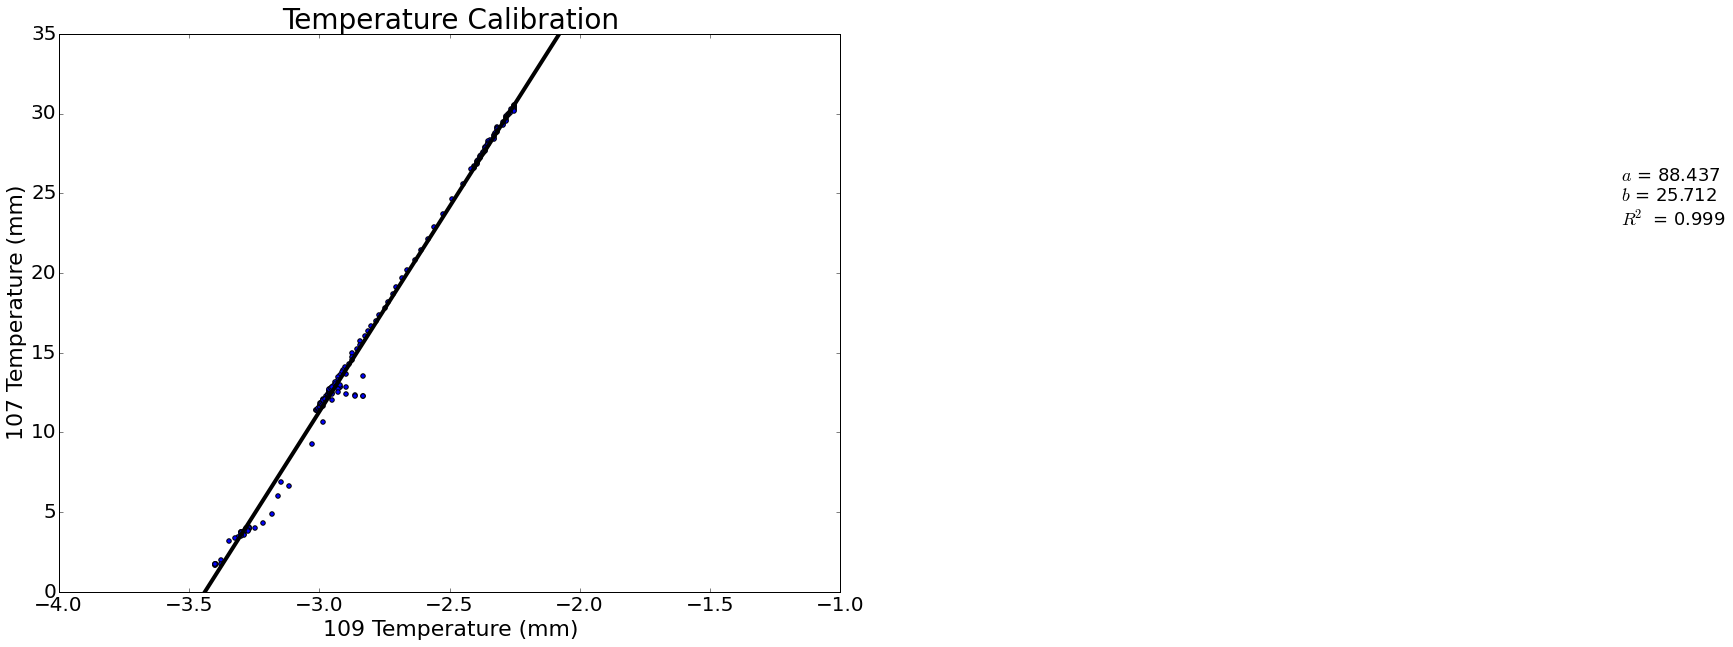

In [14]:
#Set option to fit
for X in range(1,29):
    SensorRef = 'T109_C(' + np.str(X) + ')'  #Create reference to sensor label

#Do regression
    ModTemp = sm.regression.linear_model.OLS(PotTemps[34],  # Y variable
                                        sm.add_constant(PotTemps.ix[:,SensorRef]), # X variable
                                        missing='drop',                                     # ignor and data where one value is missing
                                        hasconst=False) 
    RegTemp = ModTemp.fit();  # fit models parameters

#Draw graph to check fits
    plt.figure(figsize=(14, 10));
    plt.title('Temperature Calibration', fontsize=28);
    plt.scatter(PotTemps[SensorRef], PotTemps[34], label='Temp_oC');
    plt.ylim(0,35);
    plt.xlim(-4,-1);
    plt.xlabel('109 Temperature (mm)', fontsize=22);
    plt.ylabel('107 Temperature (mm)', fontsize=22);
    plt.tick_params(labelsize=20)
    xmin = -3.5
    xmax = -1.5
    Regres = RegTemp
    Temp_x = [xmin,xmax];
    Temp_y_fits = [Regres.params.const + xmin * Regres.params.get_value(SensorRef), Regres.params.const + xmax * Regres.params.get_value(SensorRef)];
    plt.plot(Temp_x, Temp_y_fits, c='k', lw=4);
    plt.text(2,23,  # x,y location of text box
         '$a$ = %.3f\n$b$ = %.3f\n$R^2$ = %.3f'%(Regres.params.const, Regres.params.get_value(SensorRef), Regres.rsquared)  #text box contents
         , fontsize=18)
    
#Assign coeffients to dataframe
    SensorCoefficients.ix[SensorRef,'Slope'] = Regres.params.get_value(SensorRef)
    SensorCoefficients.ix[SensorRef,'Intercept'] = Regres.params.const

## Add in coefficients for sensor that was calibrated in a seperate exercies

In [15]:
SensorCoefficients.loc['T109_C(29)'] = [25.839,84.611]

In [16]:
SensorCoefficients

,Slope,Intercept
Sensor,,
T109_C(1),25.337606,85.450982
T109_C(2),25.390787,85.410558
T109_C(3),25.908212,90.654381
T109_C(4),25.656058,86.080694
T109_C(5),25.638435,81.733668
T109_C(6),25.640291,87.285137
T109_C(7),25.375154,84.962277
T109_C(8),26.846888,108.262827
T109_C(9),25.591924,84.758181


##Export Sensor coefficient dataframe to pickle

In [17]:
pd.to_pickle(SensorCoefficients, 'C:\GitHubRepos\PotTemp\SensorCoefficients.pkl')